# Statistics:

Statistics is a branch of applied mathematics that involves the collection, description, analysis, and inference of conclusions from data.

# Data:
Data are individual pieces of factual information recorded and used for the purpose of analysis.


Type of Data:



*   Nominal Data : 
        Nominal data is used just for labeling variables, without any type of quantitative value e.g Gender (Male or Female)

*   Ordinal Data : 
        Ordinal data shows where a number is in order. This is the crucial difference from nominal types of data.

*   Discrete Data : 
            Discrete data is a count that involves only integers. The discrete values cannot be subdivided into parts.For example, the number of children in a class is discrete data. You can count whole individuals. You can’t count 1.5 kids.


*   Continous Data: 
          Continuous data is information that could be meaningfully divided into finer levels. e.g. amount of time required to complete a project, height of children.







# Descriptive statistics: 
It is a term given to the analysis of data that helps to describe, show and summarize data in a meaningful way. It is a simple way to describe our data. Descriptive statistics is very important to present our raw data.

Example: Mean, Median, Mode

# Inferential Statistics:

In inferential statistics predictions are made by taking any group of data in which you are interested. It can be defined as a random sample of data taken from a population to describe and make inference about the population. Any group of data which includes all the data you are interested is known as population. It basically allows you to make predictions by taking a small sample instead of working on whole population.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Redaing File 

df = pd.read_csv('/content/diabetes.csv')

In [43]:
df.shape

(768, 9)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
# Imputation of Missing Data

In [47]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN

In [48]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [49]:
for feature in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
  df[feature] = df[feature].fillna(df[feature].mean())

In [50]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Outlier Detection:

An outlier is a data point that differs significantly from other observations.


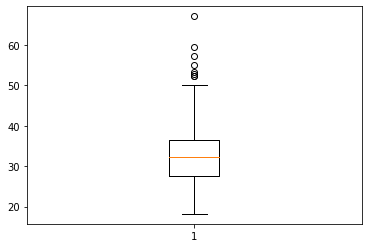

In [54]:
plt.boxplot(df['BMI'])
plt.show()

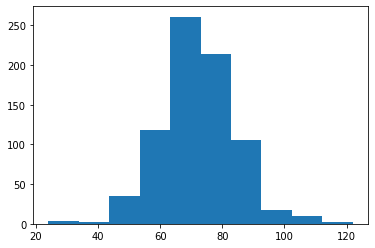

In [65]:
plt.hist(df['BloodPressure'])
plt.show()

# Quartile:

These are the points in data which divides data into multiple parts.

In [55]:
df['BMI'].quantile(0.95)

44.394999999999996

# Correlation:
Correlation is used to test relationships between quantitative variables or categorical variables. In other words, it’s a measure of how things are related.

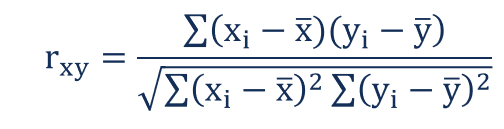

In [56]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


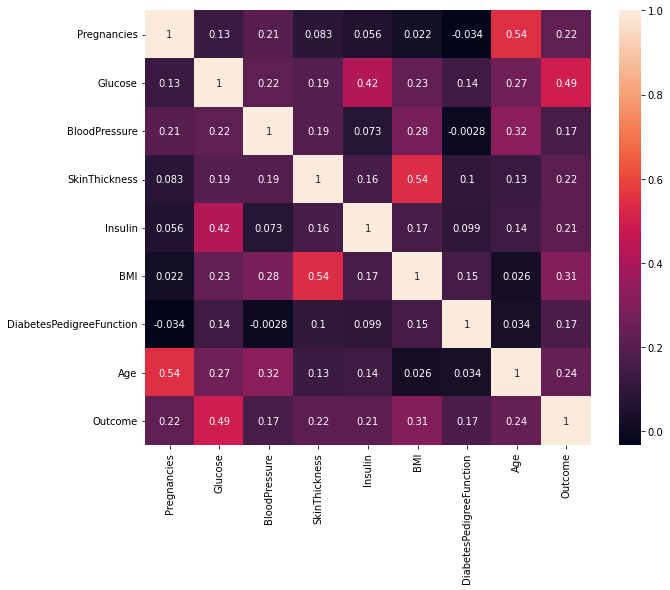

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Standard Scalling:

Standardization is a preprocessing method used to transform continuous data to make it look normally distributed.

Range: -1 to 1

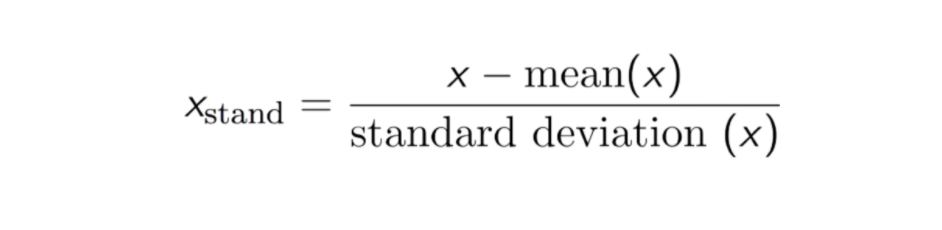

In [67]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
bloodpressure = scaler.fit_transform(df[['BloodPressure']])

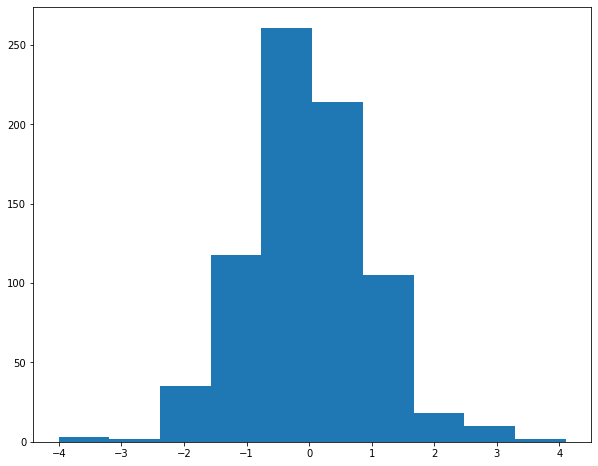

In [75]:
plt.figure(figsize=(10,8))
plt.hist(bloodpressure)
plt.show()

# MinMax Scalling:

It shifts the data into range between 0-1

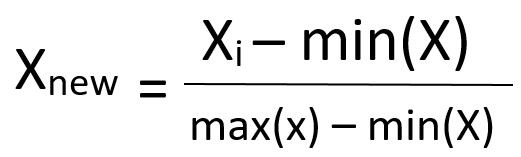

In [78]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
bmi = mm_scaler.fit_transform(df[['BMI']])

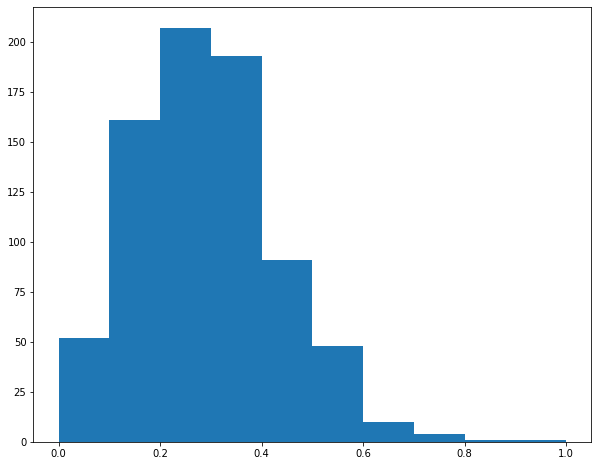

In [79]:
plt.figure(figsize=(10,8))
plt.hist(bmi)
plt.show()